# Forest Fire Total Areas FIltering For Indonesia

In [1]:
import os
import glob
import geopandas as gpd
import pandas as pd  # Ensure pandas is imported
import shutil
from multiprocessing import Pool, cpu_count


Copying all the .shape files in a folder named final_all_shapefiles. 

In [3]:
# Define the relative paths from the script's directory
source_directory = os.path.join("..", "..", "Data", "GWIS_2021", "Final")  # Source directory
destination_directory = os.path.join("..", "..", "Data", "GWIS_2021", "Final", "all_final")  # Destination directory

# Create the destination directory if it doesn't exist
os.makedirs(destination_directory, exist_ok=True)

# Variable to count total copied files
total_copied_files = 0

# Loop through each folder in the source directory
for folder_name in os.listdir(source_directory):
    folder_path = os.path.join(source_directory, folder_name)

    # Check if this is a directory
    if os.path.isdir(folder_path):
        # Get all files in the current folder
        files = glob.glob(os.path.join(folder_path, '*'))  # Match all files
        
        # Loop through each file and copy it to the destination directory
        for file in files:
            destination_file_path = os.path.join(destination_directory, os.path.basename(file))  # Destination path
            
            # If a file with the same name exists, print a message
            if os.path.exists(destination_file_path):
                print(f"Overwriting: {destination_file_path}")
            else:
                print(f"Copying: {file} to {destination_file_path}")
            
            # Copy each file to the destination directory, overwriting if it exists
            shutil.copy(file, destination_directory)  # This will overwrite existing files as needed
            total_copied_files += 1  # Increment the count

# Print a summary message
print(f'Total files copied to the destination: {total_copied_files}')

Copying: ../../Data/GWIS_2021/Final/Final_GlobFirev3_GWIS_MCD64A1__2008/Final_GlobFirev3_GWIS_MCD64A1__2008.prj to ../../Data/GWIS_2021/Final/all_final/Final_GlobFirev3_GWIS_MCD64A1__2008.prj
Copying: ../../Data/GWIS_2021/Final/Final_GlobFirev3_GWIS_MCD64A1__2008/Final_GlobFirev3_GWIS_MCD64A1__2008.shp to ../../Data/GWIS_2021/Final/all_final/Final_GlobFirev3_GWIS_MCD64A1__2008.shp
Copying: ../../Data/GWIS_2021/Final/Final_GlobFirev3_GWIS_MCD64A1__2008/Final_GlobFirev3_GWIS_MCD64A1__2008.shx to ../../Data/GWIS_2021/Final/all_final/Final_GlobFirev3_GWIS_MCD64A1__2008.shx
Copying: ../../Data/GWIS_2021/Final/Final_GlobFirev3_GWIS_MCD64A1__2008/Final_GlobFirev3_GWIS_MCD64A1__2008.dbf to ../../Data/GWIS_2021/Final/all_final/Final_GlobFirev3_GWIS_MCD64A1__2008.dbf
Copying: ../../Data/GWIS_2021/Final/Final_GlobFirev3_GWIS_MCD64A1__2006/Final_GlobFirev3_GWIS_MCD64A1__2006.dbf to ../../Data/GWIS_2021/Final/all_final/Final_GlobFirev3_GWIS_MCD64A1__2006.dbf
Copying: ../../Data/GWIS_2021/Final/Fina

Combinng all the shape files and saving. 

In [4]:
# Path to the Indonesia shape file
indo_path = "../../Data/gadm41_IDN_shp/gadm41_IDN_0.shp"

In [ ]:
# Define relative paths from the script's directory
destination_directory = os.path.join("..", "..", "Data", "GWIS_2021", "Final")  
combined_shapefile_path = os.path.join(destination_directory, 'all_final.shp')  

# Use glob to find all shapefiles
shapefiles = glob.glob(os.path.join(destination_directory, '*.shp'))

# Create a list to hold the GeoDataFrames
gdf_list = []

# Read each shapefile and append it to the list with filtering
for shapefile in shapefiles:
    gdf = gpd.read_file(shapefile)
    
    # Ensure IDate is in datetime format
    gdf['IDate'] = pd.to_datetime(gdf['IDate'], errors='coerce')  # Convert IDate to datetime

    # Filter based on IDate in the range 2005 to 2015
    filtered_gdf = gdf[(gdf['IDate'] >= '2005-01-01') & (gdf['IDate'] <= '2015-12-31')]
    
    # Append the filtered GeoDataFrame if non-empty
    if not filtered_gdf.empty:
        gdf_list.append(filtered_gdf)

# Combine all GeoDataFrames into one
if gdf_list:  # Check if the list is not empty
    combined_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True))

    # Save to a new shapefile
    combined_gdf.to_file(combined_shapefile_path)

    print('Successfully combined shapefiles into all_final.shp')
else:
    print('No observations found in the specified date range.')

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Field IDate create as date field, though DateTime requested.
  ogr_write(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Field FDate create as date field, though DateTime requested.
  ogr_write(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: 2GB file size limit reached for ../../Data/GWIS_2021/Final/all_final/all_final.shp. Going on, but might cause compatibility issues with third party software
  ogr_write(


Successfully combined shapefiles into all_final.shp


The Data is filtered from 2005 to 2015 in order to be accomodated by the shape file.

Now load indonesia shape file and only filter for observation in Indonesia using geospatial intersection.

<Axes: >

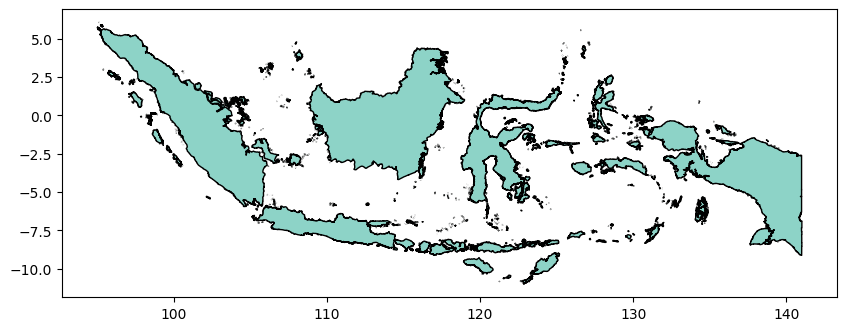

In [2]:
# Path to the Indonesia shape file
indo_path = "../../Data/gadm41_IDN_shp/gadm41_IDN_0.shp"

# Load the shape file into a GeoDataFrame
indo_gdf = gpd.read_file(indo_path)

# plot the country
indo_gdf.plot(edgecolor = "black", figsize = (10,10), cmap = "Set3")

The code below only keeps observation lying in the boundary of Indonesia, at the end filtering the observation from 2005 to 2015 for Indonesia only. The files are saved in same folder and the combined shape files.

In [3]:
# Define input/output paths
input_shapefile = "../../Data/GWIS_2021/Final/all_final/all_final.shp"
output_shapefile = "../../Data/GWIS_2021/Final/all_final/filtered_indo_output.shp"


# Read the input shapefile
gdf = gpd.read_file(input_shapefile)

# Perform spatial join to filter for Indonesia
filtered_gdf = gpd.sjoin(gdf, indo_gdf, predicate="intersects", how="inner")

# Save the filtered GeoDataFrame to a new shapefile
filtered_gdf.to_file(output_shapefile)

print(f"Filtered shapefile saved at: {output_shapefile}")


/var/folders/1b/nydz0l81533_gprr9swmqy740000gn/T/ipykernel_11345/728738193.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  filtered_gdf.to_file(output_shapefile)


Filtered shapefile saved at: ../../Data/GWIS_2021/Final/all_final/filtered_indo_output.shp


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Field IDate create as date field, though DateTime requested.
  ogr_write(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Field FDate create as date field, though DateTime requested.
  ogr_write(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'index_right' to 'index_righ'
  ogr_write(


This would spit out final area by fire in Indonesia from 2005 till 2015. 